In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

In [2]:
hdu=fits.open('/Users/jelford/Documents/PhD_Work/CARS_Data/HE1029/HE1029-1831.MUSE.WFM-NOAO.maps-full.fits')

In [3]:
OIII=hdu[11].data
OIIIhead=hdu[11].header

In [4]:
Hbeta=hdu[13].data
Hbetahead=hdu[13].header

In [5]:
NII=hdu[23].data
Halpha=hdu[9].data

In [6]:
def dist(NX,NY,beamsize,RApixel,DECpixel,C):
    X=np.arange(NX)
    Y=np.arange(NY)
    RAaxis=np.abs(((X-RApixel)*C))
    DECaxis=np.abs(((Y-DECpixel)*C))
    im=np.empty([NY,NX])
    for i in range(0,NX):
        for j in range(0,NY):
            im[j,i]=np.sqrt(RAaxis[i]**2+DECaxis[j]**2)
    return im<beamsize

In [7]:
RApix=np.int(OIIIhead['CRPIX1'])
DECpix=np.int(OIIIhead['CRPIX2'])
Xaxis=OIIIhead['NAXIS1']
Yaxis=OIIIhead['NAXIS2']
Cell=np.abs(OIIIhead['CD1_1'])

/var/folders/n9/nt30fqmx2q30zv_d6qxt4td80000gn/T/ipykernel_50650/2090982482.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  RApix=np.int(OIIIhead['CRPIX1'])
/var/folders/n9/nt30fqmx2q30zv_d6qxt4td80000gn/T/ipykernel_50650/2090982482.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current 

In [8]:
imbeam=dist(Xaxis,Yaxis,0.2/3600,RApix,DECpix,Cell)

In [9]:
OIIIimbeam=OIII*imbeam
Hbetaimbeam=Hbeta*imbeam
NIIimbeam=NII*imbeam
Halphaimbeam=Halpha*imbeam

In [11]:
X_R=np.reshape(NIIimbeam/Halphaimbeam,99538)
Y_R=np.reshape(OIIIimbeam/Hbetaimbeam,99538)

/var/folders/n9/nt30fqmx2q30zv_d6qxt4td80000gn/T/ipykernel_50650/3125486902.py:1: RuntimeWarning: invalid value encountered in true_divide
  X_R=np.reshape(NIIimbeam/Halphaimbeam,99538)
/var/folders/n9/nt30fqmx2q30zv_d6qxt4td80000gn/T/ipykernel_50650/3125486902.py:2: RuntimeWarning: invalid value encountered in true_divide
  Y_R=np.reshape(OIIIimbeam/Hbetaimbeam,99538)


/var/folders/n9/nt30fqmx2q30zv_d6qxt4td80000gn/T/ipykernel_50650/638123760.py:1: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(X_R),np.log10(Y_R),'o')


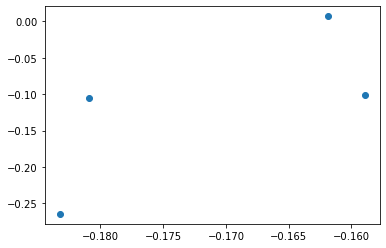

In [12]:
plt.plot(np.log10(X_R),np.log10(Y_R),'o')

(210.0, 240.0)

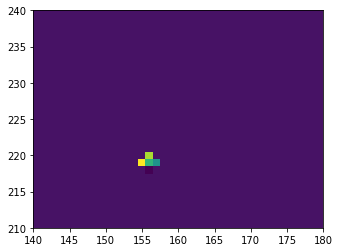

In [13]:
plt.imshow(OIIIimbeam)
plt.xlim(140,180)
plt.ylim(210,240)

In [14]:
np.where(OIIIimbeam>0)

(array([219, 219, 219, 220]), array([155, 156, 157, 156]))

In [15]:
np.where(Hbetaimbeam>0)

(array([218, 219, 219, 219, 220]), array([156, 155, 156, 157, 156]))

In [16]:
Hbetaimbeam[219,155]

1.258603

In [17]:
OIIIimbeam[219,155]

1.2787654